<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-JavyMB/blob/main/A01794423_Javier_Munoz_Actividad_7_IBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad 7
## Data Analysis with Python (IBM)
Modulo 4

**Alumno:** Javier Munoz Barrios

**Matricula:** A01794423



### Objetivos
Después de completar este laboratorio, podrá:
* Desarrollar modelos de predicción


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#This function will download the dataset into your browser 

from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [ ]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'

In [ ]:
#you will need to download the dataset; if you are running locally, please comment out the following 
await download(path, "auto.csv")
path="auto.csv"

In [ ]:

df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


## 1. Regresion Lineal y Regresion Lineal Multiple


### Regresion Lineal


$$
Y: Response \ Variable\\\\\\\\\\
X: Predictor \ Variables
$$


<b>Linear Function</b>
$$
Yhat = a + b  X
$$


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()
lm

LinearRegression()

In [ ]:
X = df[['highway-mpg']]
Y = df['price']

In [ ]:
lm.fit(X,Y)

LinearRegression()

In [ ]:
Yhat=lm.predict(X)
Yhat[0:5]   

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [ ]:
lm.intercept_

38423.30585815743

In [ ]:
lm.coef_

array([-821.73337832])

Pregunta #1 a):

Create a linear regression object called "lm1".


In [ ]:
# Write your code below and press Shift+Enter to execute 
lm1 = LinearRegression()
lm1

LinearRegression()

In [ ]:
# Write your code below and press Shift+Enter to execute 
lm1.fit(df[['engine-size']], df[['price']])
lm1

LinearRegression()

Question #1 c):
Encuentra la pendiente y la intersección del modelo. 


In [ ]:
# Write your code below and press Shift+Enter to execute 
lm1.coef_

array([[166.86001569]])

Intercepcion


In [ ]:
# Write your code below and press Shift+Enter to execute 
lm1.intercept_

array([-7963.33890628])

Pregunta #1 d): 
¿Cuál es la ecuación de la línea predicha? Puede usar x e yhat o "tamaño del motor" o "precio".


In [ ]:
# Write your code below and press Shift+Enter to execute 
# using X and Y  
Yhat=lm1.intercept_[0] + lm1.coef_[0][0]*X
Price=lm1.intercept_[0] + lm1.coef_[0][0]*df['engine-size']

Regresion Lineal Multiple


¿Qué pasa si queremos predecir el precio del automóvil usando más de una variable?

Si queremos usar más variables en nuestro modelo para predecir el precio del automóvil, podemos usar la regresión lineal múltiple. La regresión lineal múltiple es muy similar a la regresión lineal simple, pero este método se utiliza para explicar la relación entre una variable de respuesta continua (dependiente) y dos o más variables predictoras (independientes). La mayoría de los modelos de regresión del mundo real involucran múltiples predictores. Ilustraremos la estructura usando cuatro variables predictoras, pero estos resultados pueden generalizarse a cualquier número entero:

$$
Y: Response \ Variable\\\\\\\\\\
X\_1 :Predictor\ Variable \ 1\\\\
X\_2: Predictor\ Variable \ 2\\\\
X\_3: Predictor\ Variable \ 3\\\\
X\_4: Predictor\ Variable \ 4\\\\
$$


$$
a: intercept\\\\\\\\\\
b\_1 :coefficients \ of\ Variable \ 1\\\\
b\_2: coefficients \ of\ Variable \ 2\\\\
b\_3: coefficients \ of\ Variable \ 3\\\\
b\_4: coefficients \ of\ Variable \ 4\\\\
$$


Ecuacion


$$
Yhat = a + b\_1 X\_1 + b\_2 X\_2 + b\_3 X\_3 + b\_4 X\_4
$$


Del apartado anterior sabemos que otros buenos predictores de precio podrían ser:

Caballo de fuerza
peso en vacío
Tamaño de la maquina
Autopista-mpg
Desarrollemos un modelo usando estas variables como variables predictoras.


In [ ]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [ ]:
lm.fit(Z, df['price'])

LinearRegression()

In [ ]:
lm.intercept_

-15806.62462632922

In [ ]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])



$$
Yhat = a + b\_1 X\_1 + b\_2 X\_2 + b\_3 X\_3 + b\_4 X\_4
$$


<b>Price</b> = -15678.742628061467 + 52.65851272 x <b>horsepower</b> + 4.69878948 x <b>curb-weight</b> + 81.95906216 x <b>engine-size</b> + 33.58258185 x <b>highway-mpg</b>


Pregunta #2a):
Cree y entrene un modelo de regresión lineal múltiple "lm2" en el que la variable de respuesta sea "precio" y la variable de predicción sea "pérdidas normalizadas" y "mpg en carretera".


In [ ]:
# Write your code below and press Shift+Enter to execute 
lm2 = LinearRegression()
lm2.fit(df[['normalized-losses' , 'highway-mpg']],df['price'])

LinearRegression()

<details><summary>Click here for the solution</summary>

```python
lm2 = LinearRegression()
lm2.fit(df[['normalized-losses' , 'highway-mpg']],df['price'])


```

</details>


Pregunta #2b):
Encuentre el coeficiente del modelo.


In [ ]:
# Write your code below and press Shift+Enter to execute 
lm2.coef_

array([   1.49789586, -820.45434016])

<details><summary>Click here for the solution</summary>

```python
lm2.coef_

```

</details>


## 2. Evaluación del modelo mediante visualización


In [ ]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 


Gráfico de regresión

Cuando se trata de regresión lineal simple, una excelente manera de visualizar el ajuste de nuestro modelo es mediante gráficos de regresión.

Este gráfico mostrará una combinación de puntos de datos dispersos (un gráfico de dispersión), así como la línea de regresión lineal ajustada que atraviesa los datos. Esto nos dará una estimación razonable de la relación entre las dos variables, la fuerza de la correlación, así como la dirección (correlación positiva o negativa).


(0.0, 48174.636157804984)

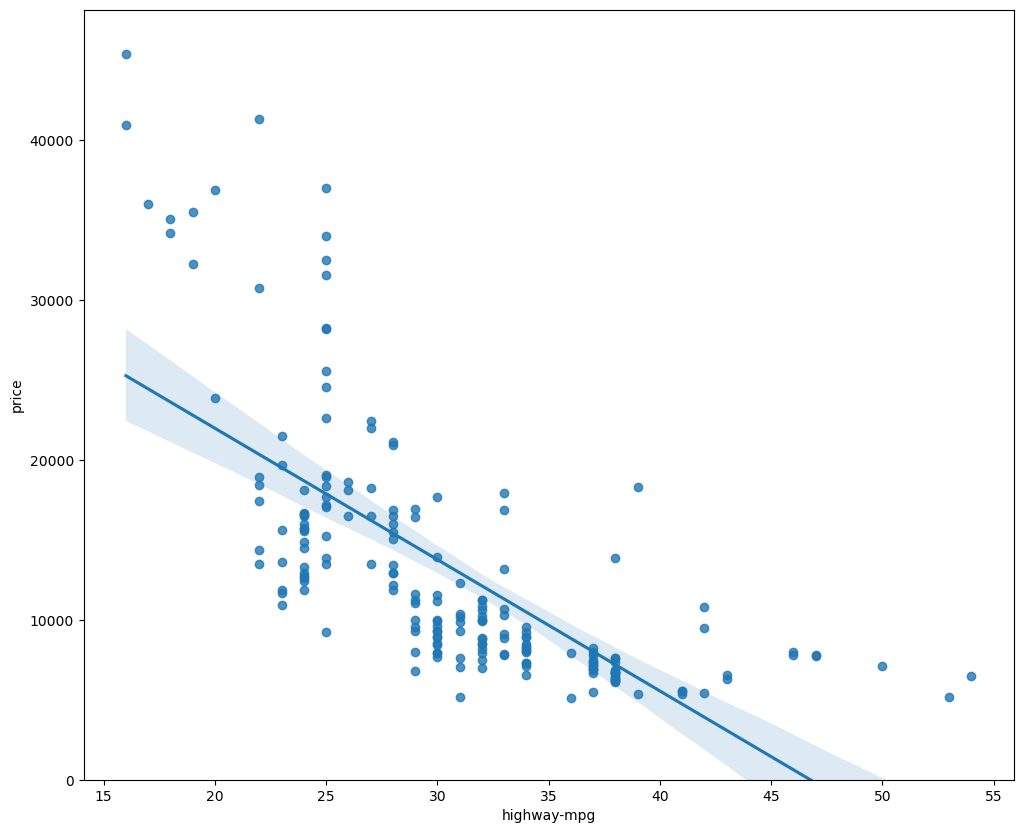

In [ ]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

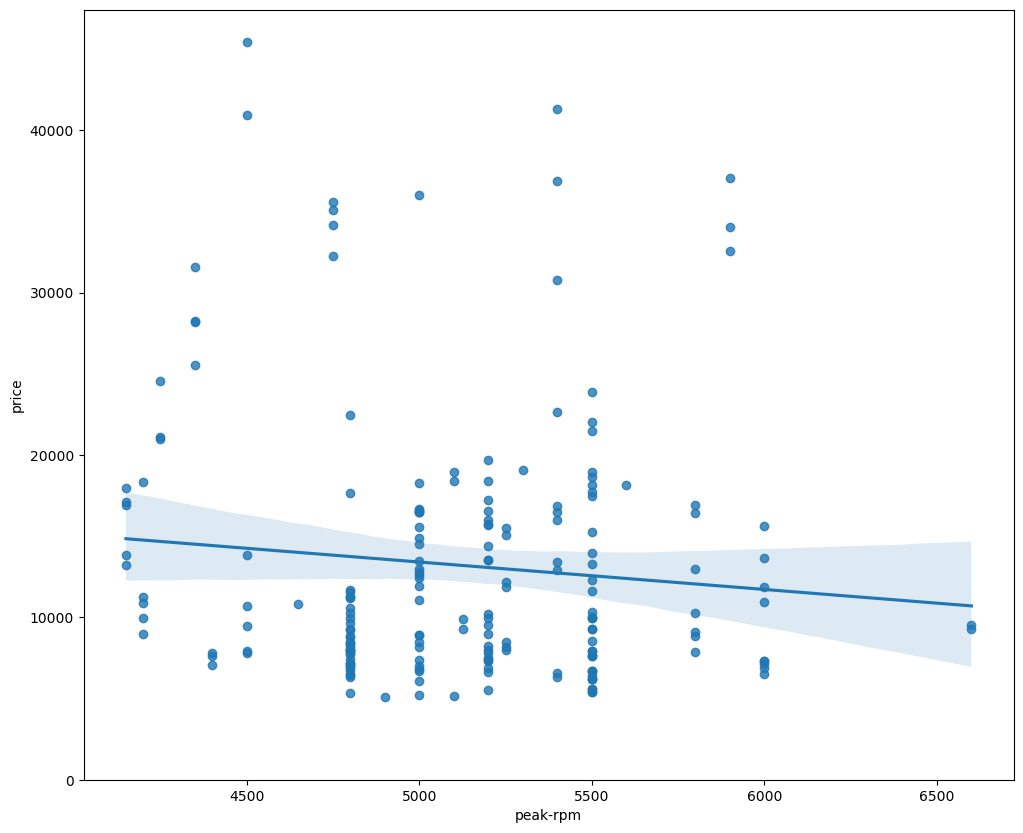

In [ ]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

Pregunta 3:
Dadas las gráficas de regresión anteriores, ¿las "rpm pico" o "mpg en carretera" están más fuertemente correlacionadas con el "precio"? Usa el método ".corr()" para verificar tu respuesta.

In [ ]:
# Write your code below and press Shift+Enter to execute 
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


Grafico Residual
Una buena manera de visualizar la varianza de los datos es usar una gráfica de residuos.

¿Qué es un residuo?

La diferencia entre el valor observado (y) y el valor pronosticado (Yhat) se llama residual (e). Cuando observamos un gráfico de regresión, el residuo es la distancia desde el punto de datos hasta la línea de regresión ajustada.

Entonces, ¿qué es un gráfico residual?

Una gráfica de residuos es un gráfico que muestra los residuos en el eje y vertical y la variable independiente en el eje x horizontal.

¿A qué prestamos atención cuando miramos una Grafica residual?

Nos fijamos en la dispersión de los residuos:

- Si los puntos en una gráfica de residuos se distribuyen aleatoriamente alrededor del eje x, entonces un modelo lineal es apropiado para los datos.

¿Porqué es eso? La distribución aleatoria de residuos significa que la varianza es constante y, por lo tanto, el modelo lineal se ajusta bien a estos datos.


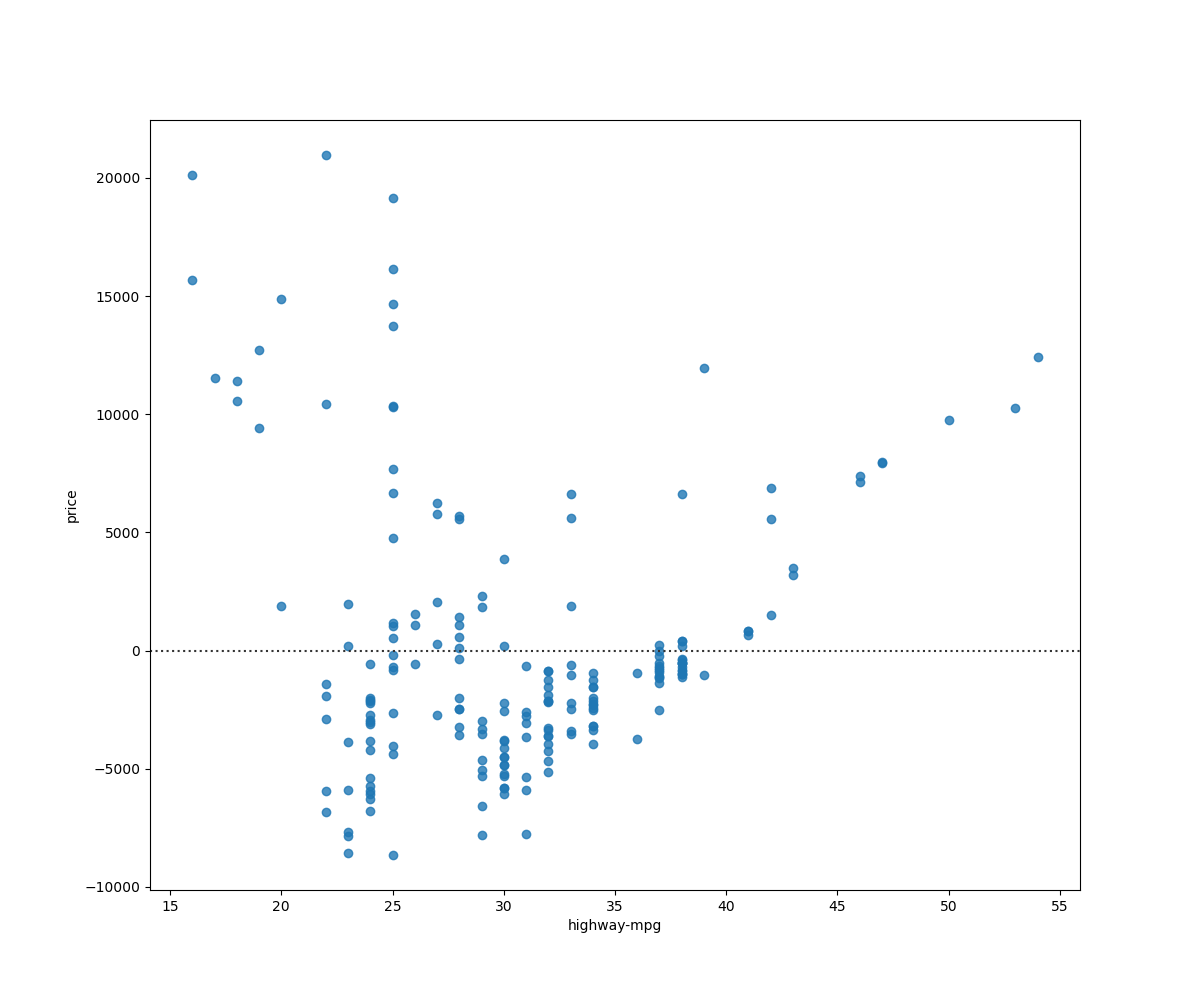

<Figure size 1200x1000 with 0 Axes>

In [ ]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'],y=df['price'])
plt.show()


¿Qué nos dice esta trama?

Podemos ver en esta gráfica de residuos que los residuos no se distribuyen aleatoriamente alrededor del eje x, lo que nos lleva a creer que tal vez un modelo no lineal sea más apropiado para estos datos.


## Regresion Lineal Multiple



¿Cómo visualizamos un modelo de regresión lineal múltiple? Esto se vuelve un poco más complicado porque no se puede visualizar con regresión o gráfico residual.

Una forma de ver el ajuste del modelo es mirar el gráfico de distribución. Podemos observar la distribución de los valores ajustados que resultan del modelo y compararla con la distribución de los valores reales.


In [ ]:
Y_hat = lm.predict(Z)


<ipython-input-34-7377bca648c1>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
<ipython-input-34-7377bca648c1>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" 

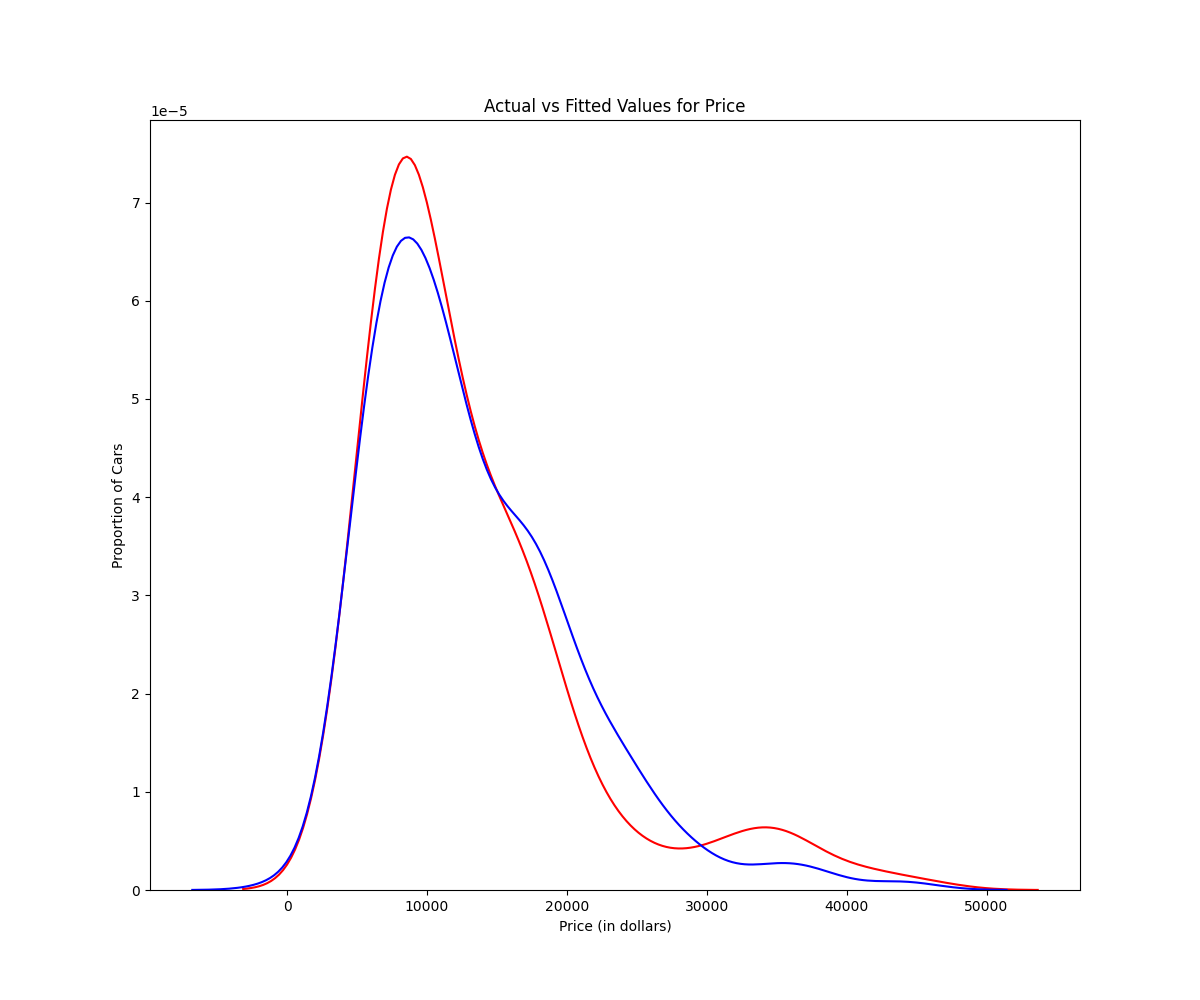

In [ ]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

## 3. Regresión polinomial y canalizaciones


La regresión polinomial es un caso particular del modelo de regresión lineal general o de los modelos de regresión lineal múltiple.

Obtenemos relaciones no lineales elevando al cuadrado o estableciendo términos de orden superior de las variables predictoras.

Hay diferentes órdenes de regresión polinomial:


<center><b>Quadratic - 2nd Order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 
$$

<center><b>Cubic - 3rd Order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 +b_3 X^3\\\\\\\\\\
$$

<center><b>Higher-Order</b>:</center>
$$
Y = a + b_1 X +b_2 X^2 +b_3 X^3 ....\\\\
$$


Vimos anteriormente que un modelo lineal no proporcionaba el mejor ajuste al utilizar "mpg en carretera" como variable de predicción. Veamos si podemos intentar ajustar un modelo polinomial a los datos.

In [ ]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

Let's get the variables:


In [ ]:
x = df['highway-mpg']
y = df['price']

In [ ]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


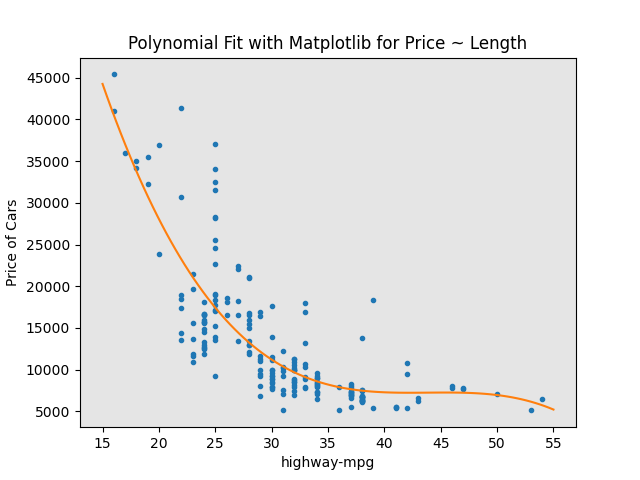

In [ ]:
PlotPolly(p, x, y, 'highway-mpg')

In [ ]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

Pregunta #4:
Cree un modelo polinomial de 11 órdenes con las variables x e y de arriba.

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


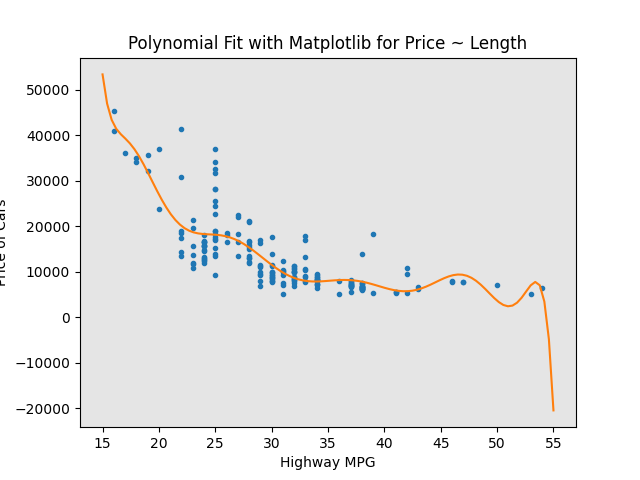

In [ ]:
# Write your code below and press Shift+Enter to execute 
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

$$
Yhat = a + b\_1 X\_1 +b\_2 X\_2 +b\_3 X\_1 X\_2+b\_4 X\_1^2+b\_5 X\_2^2
$$


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [ ]:
Z_pr=pr.fit_transform(Z)

In [ ]:
Z.shape

(201, 4)

In [ ]:
Z_pr.shape

(201, 15)

## Pipeline


Los Pipelines de datos simplifican los pasos para procesar los datos. Usamos el módulo Pipeline para crear un pipeline. También usamos StandardScaler como un paso en nuestra canalización.


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [ ]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [ ]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [ ]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

Pregunta #5:
Cree una canalización que estandarice los datos, luego produzca una predicción usando un modelo de regresión lineal usando las características Z y el objetivo y.


In [ ]:
# Write your code below and press Shift+Enter to execute 
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

## 4. Medidas para la evaluación dentro de la muestra


Al evaluar nuestros modelos, no solo queremos visualizar los resultados, sino que también queremos una medida cuantitativa para determinar qué tan preciso es el modelo.

Dos medidas muy importantes que se utilizan a menudo en Estadística para determinar la precisión de un modelo son:

R^2 / R-cuadrado
Error cuadrático medio (MSE)
R-cuadrado

R cuadrado, también conocido como coeficiente de determinación, es una medida para indicar qué tan cerca están los datos de la línea de regresión ajustada.

El valor de la R-cuadrado es el porcentaje de variación de la variable de respuesta (y) que se explica mediante un modelo lineal.

Error cuadrático medio (MSE)

El error cuadrático medio mide el promedio de los cuadrados de los errores. Es decir, la diferencia entre el valor real (y) y el valor estimado (ŷ).

In [ ]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339176


In [ ]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


In [ ]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


In [ ]:
Y_predict_multifit = lm.predict(Z)

In [ ]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


## 5. Predicción y Toma de Decisiones Diferencia entre el valor real (y) y el valor estimado (ŷ).


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

In [ ]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [ ]:
lm.fit(X, Y)
lm

LinearRegression()

In [ ]:
yhat=lm.predict(new_input)
yhat[0:5]

/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

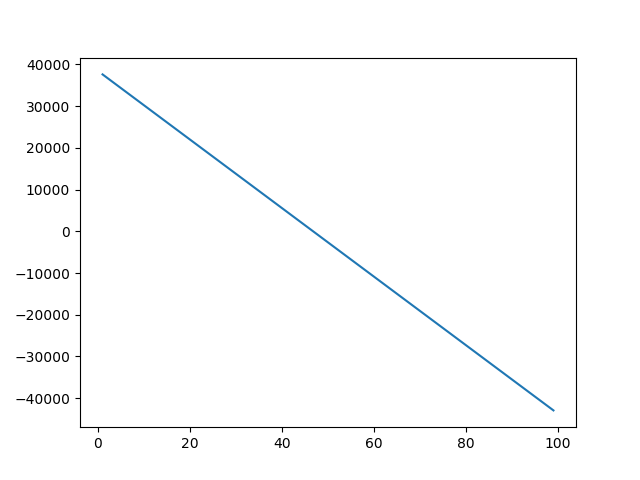

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(new_input, yhat)
plt.show()

¿Cuál es un buen valor de R-cuadrado?
Al comparar modelos, el modelo con el valor R cuadrado más alto se ajusta mejor a los datos.

¿Qué es una buena MSE?
Al comparar modelos, el modelo con el valor MSE más pequeño se ajusta mejor a los datos.

Echemos un vistazo a los valores para los diferentes modelos.
Regresión lineal simple: uso de Highway-mpg como variable predictora del precio.

R-cuadrado: 0,49659118843391759
MSE: 3,16x10^7
Regresión lineal múltiple: uso de caballos de fuerza, peso en orden de marcha, tamaño del motor y mpg en carretera como variables predictoras del precio.

R-cuadrado: 0.80896354913783497
MSE: 1,2x10^7
Ajuste polinomial: Uso de Highway-mpg como variable predictora de precio.

R-cuadrado: 0,6741946663906514
MSE: 2,05 x 10^7
